In [1]:
# show this later on
def function3(input3):
    return input3

In [2]:
def function1(input1):
    return input1 + "from first function"

def function2(input2):
    output=function3("this is function 3 in between")
    return input2 + " " + output + " and savita from second function"

In [3]:
from langgraph.graph import Graph
workflow1=Graph()
workflow1.add_node("function1", function1)
workflow1.add_node("function2",function2)
workflow1.add_edge("function1","function2")
workflow1.set_entry_point("function1")
workflow1.set_finish_point("function2")
app1=workflow1.compile()

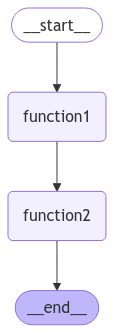

In [5]:
from IPython.display import Image, display

try:
    display(Image(app1.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [6]:
app1.invoke("hi this is sunny ")

'hi this is sunny from first function this is function 3 in between and savita from second function'

In [8]:
input_str = "hi this is sunny"
for output in app1.stream(input_str):
    for key, value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from function1
_______
hi this is sunnyfrom first function


here is output from function2
_______
hi this is sunnyfrom first function this is function 3 in between and savita from second function




# Now lets create workflow with llm

In [12]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash-8b")
llm.invoke("hi").content

'Hello! How can I help you?'

In [14]:
def function1(input):
    llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash-8b")
    response=llm.invoke(input).content
    return response

In [15]:
def function2(input):
    upper_case=input.upper()
    return upper_case

In [16]:
from langgraph.graph import Graph
workflow2=Graph()

In [17]:
workflow2.add_node("llm",function1)
workflow2.add_node("upper_case",function2)
workflow2.add_edge("llm","upper_case")
workflow2.set_entry_point("llm")
workflow2.set_finish_point("upper_case")
app2=workflow2.compile()

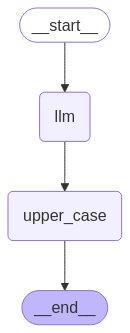

In [18]:
from IPython.display import Image, display

try:
    display(Image(app2.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [19]:
app2.invoke("what is a name of first indian prime minister?")

'JAWAHARLAL NEHRU'

In [20]:
input="what is a name of first indian prime minister?"
for output in app2.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from llm
_______
Jawaharlal Nehru


here is output from upper_case
_______
JAWAHARLAL NEHRU




### Here lets create our own output token counter

In [21]:
def function3(input):
    token=input.split()
    token_number=len(token)
    token_number=f"total token number is {token_number}"
    return token_number

In [22]:
workflow3=Graph()
workflow3.add_node("llm",function1)
workflow3.add_node("token_counter",function3)
workflow3.add_edge("llm","token_counter")
workflow3.set_entry_point("llm")
workflow3.set_finish_point("token_counter")
app3=workflow3.compile()

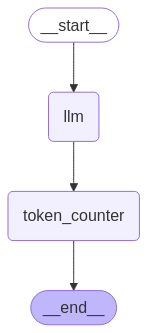

In [23]:
from IPython.display import Image, display

try:
    display(Image(app3.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [24]:
app3.invoke("what is a name of first indian prime minister?")

'total token number is 2'

In [25]:
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=2)
tools = [tool]
tool.invoke("What's a 'node' in LangGraph?")

[{'title': "Beginner's Guide to LangGraph: Understanding State, Nodes, and ...",
  'url': 'https://medium.com/@kbdhunga/beginners-guide-to-langgraph-understanding-state-nodes-and-edges-part-1-897e6114fa48',
  'content': "Beginner’s Guide to LangGraph: Understanding State, Nodes, and Edges — Part 1 | by Kamal Dhungana | Medium Beginner’s Guide to LangGraph: Understanding State, Nodes, and Edges — Part 1 LangGraph — State, Node and Edge Explained Mainly, we will focus on various components of LangGraph: State, Node, and Edges, and how to build a complete graph from these components. Once we understand these components, we will be able to build relatively complex LangGraph-based agents. Each node represents a specific function or operation that processes the current state. Nodes can perform computations, modify the state, or generate outputs based on the input they receive. Follow 1.2K Followers Data scientist with a passion for AI, Regularly blogging about LLM and OpenAI's innovations,Sh

### Question: Can we integrating a RAG Pipeline?

### Answer: yes we can!

In [4]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

d:\tmp\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash-8b")

In [6]:
llm.invoke("hi").content

'Hi there! How can I help you?'

In [7]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [8]:
loader=DirectoryLoader("../data",glob="./*.txt",loader_cls=TextLoader)
docs=loader.load()
text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=50
)
new_docs = text_splitter.split_documents(documents=docs)
doc_strings = [doc.page_content for doc in new_docs]

In [9]:
text_splitter

In [10]:
new_docs

[Document(metadata={'source': '..\\data\\sample.txt'}, page_content='Dr. A.P.J. Abdul Kalam, known as the "Missile Man of India," was an eminent scientist,'),
 Document(metadata={'source': '..\\data\\sample.txt'}, page_content='visionary leader, and the 11th President of India (2002-2007). Born on October 15, 1931,'),
 Document(metadata={'source': '..\\data\\sample.txt'}, page_content="in Rameswaram, Tamil Nadu, he played a crucial role in India's defense and space programs,"),
 Document(metadata={'source': '..\\data\\sample.txt'}, page_content='contributing to the development of ballistic missile technology and the Pokhran-II'),
 Document(metadata={'source': '..\\data\\sample.txt'}, page_content='nuclear tests. A passionate advocate for education and youth empowerment, he inspired'),
 Document(metadata={'source': '..\\data\\sample.txt'}, page_content='millions with his vision for a developed India, outlined in books like *Wings of Fire*'),
 Document(metadata={'source': '..\\data\\samp

In [11]:
doc_strings

['Dr. A.P.J. Abdul Kalam, known as the "Missile Man of India," was an eminent scientist,',
 'visionary leader, and the 11th President of India (2002-2007). Born on October 15, 1931,',
 "in Rameswaram, Tamil Nadu, he played a crucial role in India's defense and space programs,",
 'contributing to the development of ballistic missile technology and the Pokhran-II',
 'nuclear tests. A passionate advocate for education and youth empowerment, he inspired',
 'millions with his vision for a developed India, outlined in books like *Wings of Fire*',
 'and *Ignited Minds*. Despite his scientific achievements, he remained humble and deeply',
 "committed to the nation's progress. Dr. Kalam passed away on July 27, 2015, while",
 'delivering a lecture, leaving behind a legacy of innovation, dedication, and unwavering',
 'patriotism.']

In [12]:
db = Chroma.from_documents(new_docs, embeddings)

retriever = db.as_retriever(search_kwargs={"k": 3})

In [13]:
query = "who is apj abdul kalam?"
docs = retriever.get_relevant_documents(query)
print(docs[0].metadata)
print(docs[0].page_content)

for doc in docs:
    print(doc)

C:\Users\Pavilion\AppData\Local\Temp\ipykernel_24088\3732195425.py:2: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = retriever.get_relevant_documents(query)


{'source': '..\\data\\sample.txt'}
Dr. A.P.J. Abdul Kalam, known as the "Missile Man of India," was an eminent scientist,
page_content='Dr. A.P.J. Abdul Kalam, known as the "Missile Man of India," was an eminent scientist,' metadata={'source': '..\\data\\sample.txt'}
page_content='committed to the nation's progress. Dr. Kalam passed away on July 27, 2015, while' metadata={'source': '..\\data\\sample.txt'}
page_content='millions with his vision for a developed India, outlined in books like *Wings of Fire*' metadata={'source': '..\\data\\sample.txt'}


In [37]:
def function_1(AgentState):
    
    message=AgentState["messages"]
    
    question=message[-1]
    
    complete_prompt="Your task is to provide only the brief answer based on the user query. \
        Don't include too much reasoning. Following is the user query: " + question
    
    response = llm.invoke(complete_prompt)
    
    AgentState['messages'].append(response.content) # appending LLM call response to the AgentState
    
    #print(AgentState)
    
    return AgentState

In [38]:
AgentState={}

In [39]:
AgentState["messages"]=[]

In [40]:
AgentState

{'messages': []}

In [41]:
AgentState["messages"].append("hi, how are you?")

In [42]:
AgentState

{'messages': ['hi, how are you?']}

In [43]:
AgentState["messages"].append("hi, what you doing?")

In [44]:
AgentState

{'messages': ['hi, how are you?', 'hi, what you doing?']}

In [45]:
def function_2(AgentState):
    messages = AgentState['messages']
    question = messages[0] ## Fetching the user question

    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)

    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
        )
    result = retrieval_chain.invoke(question)
    return result

In [46]:
# Define a Langchain graph
from langgraph.graph import Graph
workflow4 = Graph()
workflow4.add_node("LLM", function_1)
workflow4.add_node("RAGtool", function_2)
workflow4.add_edge('LLM', 'RAGtool')
workflow4.set_entry_point("LLM")
workflow4.set_finish_point("RAGtool")
app4 = workflow4.compile()

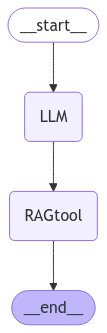

In [47]:
from IPython.display import Image, display

try:
    display(Image(app4.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [50]:
inputs = {"messages": ["what apj abdul kalam sir did for india?"]}  

In [51]:
app4.invoke(inputs)

"Committed to the nation's progress, and had a vision for a developed India, outlined in books like *Wings of Fire*."

In [52]:
for output in app4.stream(inputs):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("\n---\n")

Output from node 'LLM':
---
{'messages': ['what apj abdul kalam sir did for india?', "Developed India's missile and space programs, served as President.", 'A.P.J. Abdul Kalam']}

---

Output from node 'RAGtool':
---
Committed to the nation's progress, and had a vision for a developed India, outlined in books like *Wings of Fire*.

---



---

In [54]:
loader2=DirectoryLoader("../data",glob="./*.txt",loader_cls=TextLoader)
docs2=loader2.load()

text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=50
)
new_docs2 = text_splitter.split_documents(documents=docs2)
doc_strings2 = [doc.page_content for doc in new_docs2]

In [55]:
db2 = Chroma.from_documents(new_docs2, embeddings)
retriever2 = db2.as_retriever(search_kwargs={"k": 3})

In [56]:
query = "apj full form"
docs = retriever2.get_relevant_documents(query)
print(docs[0].metadata)
print(docs[0].page_content)

for doc in docs:
    print(doc)

{'source': '..\\data\\sample.txt'}
Dr. A.P.J. Abdul Kalam, known as the "Missile Man of India," was an eminent scientist,
page_content='Dr. A.P.J. Abdul Kalam, known as the "Missile Man of India," was an eminent scientist,' metadata={'source': '..\\data\\sample.txt'}
page_content='Dr. A.P.J. Abdul Kalam, known as the "Missile Man of India," was an eminent scientist,' metadata={'source': '..\\data\\sample.txt'}
page_content='visionary leader, and the 11th President of India (2002-2007). Born on October 15, 1931,' metadata={'source': '..\\data\\sample.txt'}


1. TypedDict:
- TypedDict is a special type that allows you to define a dictionary in Python where each key has a specific type.
It’s useful when you want to enforce type checks on the keys and values of a dictionary.

2. Annotated:
- Annotated is used to add metadata or constraints to a type.
It’s typically used for adding additional information, like constraints or descriptions, to the type.

3. Sequence[BaseMessage]:
- Sequence is a generic type from Python's typing module that represents a list-like structure (such as a list or tuple) where the order matters, and you can access elements by their position.

4. BaseMessage:
- Basemessage: This assumes you're working with the LangChain framework, and BaseMessage is part of its core messaging system. It is typically used when handling or processing messages in LangChain's workflows

5. operator.add:

- operator.add is a function from Python’s operator module that performs addition (+) on its arguments.
In this context, operator.add is being used as metadata for the Annotated type, likely suggesting that the sequence of BaseMessage objects is meant to be "added" or concatenated with another sequence at some point. It’s an indicator of how the messages field will be treated in the logic of your program.


- **TopicSelectionParser:** A Pydantic model that defines two fields (Topic and Reasoning), both of which are required to be strings.
- **Field:** Adds metadata, like descriptions, and can also be used for validation and constraints.
- **Pydantic’s Role:** Ensures that the data matches the expected structure and types, raising validation errors if the data is invalid.

In [57]:
from typing import TypedDict, Annotated, Sequence
import operator
from langchain_core.messages import BaseMessage
from langchain.prompts import PromptTemplate

In [58]:
class AgentState(TypedDict):
    # The 'messages' field should be a sequence of strings, and we annotate it with 'operator.add'
    # This implies we might want to "add" new messages to the sequence later
    messages: Annotated[Sequence[BaseMessage], operator.add]

### Putting It All Together:

- The line messages: Annotated[Sequence[BaseMessage], operator.add] defines a field messages that:

- Must be a sequence (like a list or tuple) of BaseMessage objects.
Has the additional annotation operator.add, which suggests that this sequence is intended to support addition (i.e., concatenation of multiple sequences of messages).

messages: Annotated[Sequence[BaseMessage], operator.add]

"messages": [BaseMessage("Hello!", "Alice"), BaseMessage("Hi!", "Bob")]

In [59]:
from pydantic import BaseModel , Field
class TopicSelectionParser(BaseModel):
    Topic: str = Field(description='Selected Topic')
    Reasoning: str = Field(description='Reasoning behind topic selection')

In [60]:
from langchain.output_parsers import PydanticOutputParser
parser = PydanticOutputParser(pydantic_object=TopicSelectionParser)

In [61]:
print(parser.get_format_instructions())

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"Topic": {"description": "Selected Topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}
```


In [62]:
def function_1(state):
    message=state["messages"]
    question=message[-1]
    print(question)
    
    template="""
    Your task is to classify the given user query into one of the following categories: [India, Not Related]. 
    Only respond with the category name and nothing else.

    User query: {question}
    {format_instructions}
    """
    
    prompt = PromptTemplate(template=template,
                                    input_variables=[question],
                                    partial_variables={
                                        "format_instructions" : parser.get_format_instructions()                                    }
                                    )
    chain =  prompt | llm | parser
    
    response = chain.invoke({"question":question,"format_instructions" : parser.get_format_instructions() })

    print(response)

    return {"messages": [response.Topic]}

In [65]:
state={"messages": ["who is apj abdul kalam?"]}
function_1(state)

who is apj abdul kalam?
Topic='India' Reasoning='APJ Abdul Kalam was a prominent Indian scientist and statesman.'


{'messages': ['India']}

In [66]:
def router(state):
    print('-> Router ->')
    
    messages = state["messages"]
    last_message = messages[-1]
    print(last_message)
    if 'India' in last_message:
        return 'RAG Call'
    else:
        return 'LLM Call'

In [67]:
def function_2(state):
    print('-> Calling RAG ->')
    messages = state['messages']
    question = messages[0] ## Fetching the user question
    print(question)

    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)
    
    print(prompt)

    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
        )
    result = retrieval_chain.invoke(question)
    return  {"messages": [result]}

In [68]:
def function_3(state):
    print('-> Calling LLM ->')

    messages = state['messages']
    question = messages[0] ## Fetching the user question

    # Normal LLM call
    complete_query = "Anwer the follow question with your knowledge of the real world. Following is the user question: " + question
    response = llm.invoke(complete_query)
    return {"messages": [response.content]}

In [69]:
from langgraph.graph import StateGraph,END

workflow5 = StateGraph(AgentState) ### StateGraph with AgentState


workflow5.add_node("agent", function_1)

workflow5.add_node("RAG", function_2)

workflow5.add_node("LLM", function_3)


workflow5.set_entry_point("agent")

workflow5.add_conditional_edges(
    "agent",
    
    
    router,
    {
        "RAG Call": "RAG",
        "LLM Call": "LLM",
    }
)

workflow5.add_edge("RAG",END)


workflow5.add_edge("LLM",END)


app5=workflow5.compile()

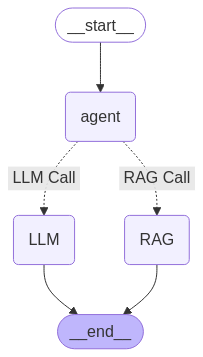

In [70]:
from IPython.display import Image, display

try:
    display(Image(app5.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [76]:
inputs = {"messages": ["which college apj abdul kalam studied?"]}

In [77]:
output = app5.invoke(inputs)

which college apj abdul kalam studied?
Topic='India' Reasoning="The query asks about a renowned Indian scientist, implying a connection to India's educational institutions."
-> Router ->
India
-> Calling RAG ->
which college apj abdul kalam studied?
input_variables=['context', 'question'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template='Answer the question based only on the following context:\n    {context}\n\n    Question: {question}\n    '), additional_kwargs={})]


In [78]:
output

{'messages': ['which college apj abdul kalam studied?',
  'India',
  'The provided text does not contain information about which college A.P.J. Abdul Kalam attended.']}

In [79]:
inputs = {"messages": ["who is a president of USA?"]}
output = app5.invoke(inputs)
output

who is a president of USA?
Topic='Not Related' Reasoning='The query asks about the president of the USA, which is not related to India.'
-> Router ->
Not Related
-> Calling LLM ->


{'messages': ['who is a president of USA?',
  'Not Related',
  'The current president of the USA is Joe Biden.']}